# Data Cleansing

This notebook is dedicated to preparing some data to further Analysis. To accomplish that, we will:
1. **Import** the data, we have 8 .csv files with different kinds of data   
2. **Combine** the data, below we have the database schematic. We will combine the data accordingly. 
3. **Explore** the data, search for NA values, look for inconsistencies   
4. **Treat** the data and perform operations to end up with a good dataframe   

***

## Dataset and data structure

We utilized the [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) for the analysis. The dataset has information on 100k orders from 2016 and 2018 with orders made at [Olist e-commerce](https://olist.com), the largest department store in Brazil. The data is structured in 8 tables as shown below. 

#### Data structure  
Tables
* `customers`
* `geolocation`
* `order_items`
* `order_payments`
* `order_reviews`
* `orders`
* `products`
* `sellers`
* `product_category_name_translation`

#### The tables connections are shown in this schema:

<img src="olist_db.png" alt="Drawing" align="left" style="width: 600px;"/>

***

### Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

### Importing data

In [2]:
customers = pd.read_csv('./data/olist_customers_dataset.csv')
order_items = pd.read_csv('./data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('./data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('./data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('./data/olist_orders_dataset.csv')
products = pd.read_csv('./data/olist_products_dataset.csv')
sellers = pd.read_csv('./data/olist_sellers_dataset.csv')
product_category_translation = pd.read_csv('./data/product_category_name_translation.csv')

### Mergin data

In [3]:
#Creating dataframe

df = customers.merge(orders, on=['customer_id'])
df = df.merge(order_items, on=['order_id'])
df = df.merge(products, on=['product_id'])
df = df.merge(order_payments, on=['order_id'])
df = df.merge(sellers, on=['seller_id'])
df = df.merge(order_reviews, on=['order_id'])
df = df.merge(product_category_translation, on=['product_category_name'])

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8577,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8577,itaquaquecetuba,SP,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8577,itaquaquecetuba,SP,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,8577,itaquaquecetuba,SP,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,8577,itaquaquecetuba,SP,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,office_furniture


### Exploring the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  order_item_id                 

In [5]:
def calculate_density(dataframe):
    
    num_cat_features = len(dataframe.select_dtypes(include=['object']).columns)
    
    print("Dataset dimensions: {} rows e {} columns".format(dataframe.shape[0], dataframe.shape[1]))
    print("Number of categorical variables: {}".format(num_cat_features))
    print("Number of continuous variables: {}\n".format(len(dataframe.columns)-num_cat_features))
    
    sparsity_dict = {}
    for col in dataframe.columns:
        sparsity_dict[col] = dataframe[col].count()/dataframe.shape[0]
    
    sparsity_dict = sorted(sparsity_dict.items(), key=lambda x: x[1])
    
    for item in sparsity_dict:
      print("{:30} => Density of {:4.4f}%".format(item[0], item[1]*100))

In [6]:
calculate_density(df)

Dataset dimensions: 115609 rows e 40 columns
Number of categorical variables: 24
Number of continuous variables: 16

review_comment_title           => Density of 11.9377%
review_comment_message         => Density of 42.3029%
order_delivered_customer_date  => Density of 97.9240%
order_delivered_carrier_date   => Density of 98.9663%
order_approved_at              => Density of 99.9879%
product_weight_g               => Density of 99.9991%
product_length_cm              => Density of 99.9991%
product_height_cm              => Density of 99.9991%
product_width_cm               => Density of 99.9991%
customer_id                    => Density of 100.0000%
customer_unique_id             => Density of 100.0000%
customer_zip_code_prefix       => Density of 100.0000%
customer_city                  => Density of 100.0000%
customer_state                 => Density of 100.0000%
order_id                       => Density of 100.0000%
order_status                   => Density of 100.0000%
order_purcha

#### First impressions:

We can see, based on the density of each column, that the overall data quality is pretty good, except in the first two rows 'review_comment_title' and 'review_comment_message'. This makes sense since most customers do not write a review.    
   
My suggestion here is to drop these columns for the general Analysis and, if necessary, analyze them separately. After dropping this column, we will drop all NA values since they represent less than 3% of our data. 

In [7]:
#Dropping unnecessary columns
df.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)

In [8]:
#Dropping NA values
df = df.dropna(how='any')

In [9]:
calculate_density(df)

Dataset dimensions: 113193 rows e 38 columns
Number of categorical variables: 22
Number of continuous variables: 16

customer_id                    => Density of 100.0000%
customer_unique_id             => Density of 100.0000%
customer_zip_code_prefix       => Density of 100.0000%
customer_city                  => Density of 100.0000%
customer_state                 => Density of 100.0000%
order_id                       => Density of 100.0000%
order_status                   => Density of 100.0000%
order_purchase_timestamp       => Density of 100.0000%
order_approved_at              => Density of 100.0000%
order_delivered_carrier_date   => Density of 100.0000%
order_delivered_customer_date  => Density of 100.0000%
order_estimated_delivery_date  => Density of 100.0000%
order_item_id                  => Density of 100.0000%
product_id                     => Density of 100.0000%
seller_id                      => Density of 100.0000%
shipping_limit_date            => Density of 100.0000%
pri

### Treating the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113193 non-null  object 
 1   customer_unique_id             113193 non-null  object 
 2   customer_zip_code_prefix       113193 non-null  int64  
 3   customer_city                  113193 non-null  object 
 4   customer_state                 113193 non-null  object 
 5   order_id                       113193 non-null  object 
 6   order_status                   113193 non-null  object 
 7   order_purchase_timestamp       113193 non-null  object 
 8   order_approved_at              113193 non-null  object 
 9   order_delivered_carrier_date   113193 non-null  object 
 10  order_delivered_customer_date  113193 non-null  object 
 11  order_estimated_delivery_date  113193 non-null  object 
 12  order_item_id                 

In [11]:
#Converting to datetime

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format="%Y/%m/%d")
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], format="%Y/%m/%d")
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], format="%Y/%m/%d")
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], format="%Y/%m/%d")
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'], format="%Y/%m/%d")
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'], format="%Y/%m/%d")
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'], format="%Y/%m/%d")
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'], format="%Y/%m/%d")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113193 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113193 non-null  object        
 1   customer_unique_id             113193 non-null  object        
 2   customer_zip_code_prefix       113193 non-null  int64         
 3   customer_city                  113193 non-null  object        
 4   customer_state                 113193 non-null  object        
 5   order_id                       113193 non-null  object        
 6   order_status                   113193 non-null  object        
 7   order_purchase_timestamp       113193 non-null  datetime64[ns]
 8   order_approved_at              113193 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113193 non-null  object        
 10  order_delivered_customer_date  113193 non-null  datetime64[ns]
 11  

#### Looking the data in more detail

In [13]:
df.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score
count,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000
mean,35085.687437,1.195065,119.846650,20.002595,48.802894,784.727183,2.206833,2106.236075,30.278091,16.597422,23.099679,1.090818,2.943680,171.557922,24525.441352,4.082505
std,29867.822574,0.687526,181.079901,15.711728,10.016138,650.332251,1.718331,3765.207714,16.145105,13.437427,11.735929,0.686674,2.779181,264.197701,27648.963528,1.345924
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000,1.000000
25%,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.850000,6429.000000,4.000000
50%,24315.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,107.960000,13660.000000,5.000000
75%,58865.000000,1.000000,132.980000,21.190000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.150000,28495.000000,5.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,26.000000,24.000000,13664.080000,99730.000000,5.000000


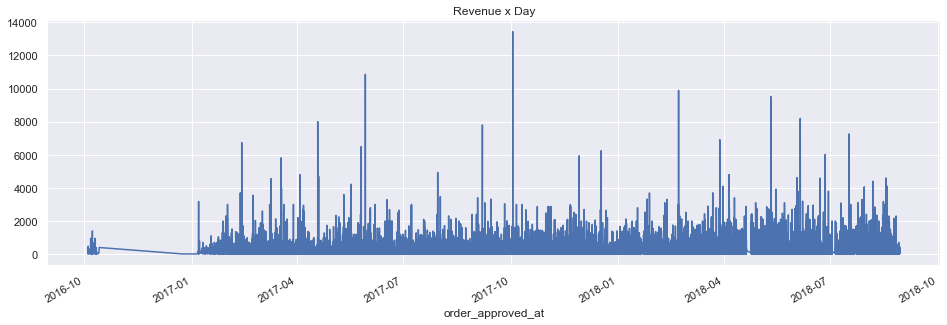

In [14]:
revenue = df.groupby('order_approved_at')['price'].aggregate(np.sum)

plt.figure(figsize=(16,5))
plt.title("Revenue x Day")
revenue.plot()
plt.show()

As we can see in the graph above, the data before 2017 is not so good. This is not a big deal since it's a small part of the dataset. The decision here is to eliminate de data before 2017. 

In [15]:
#Selecting dates beggining in 2017 
df = df.loc[df['order_approved_at'] > pd.to_datetime('01-01-2017')]

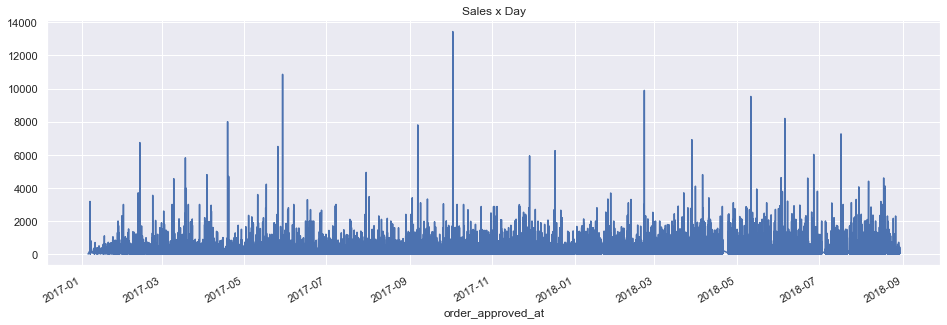

In [16]:
revenue = df.groupby('order_approved_at')['price'].aggregate(np.sum)

plt.figure(figsize=(16,5))
plt.title("Sales x Day")
revenue.plot()
plt.show()

much better now

### Data is ready!   
   
For an initial treatment, the data looks good. Keep in mind that we can go much deeper than this depending on the necessity of the client. It is possible to perform a number of tests to analyze the data consistensy. 

In [20]:
# Exporting the data as .csv

df.to_csv('Olist_dataframe_clean.csv')